In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn

crime = pd.read_csv('E:/Vancouver Crime Final/vancouver_crime_all.csv')

crime.head()

,c_id,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,16,Theft of Bicycle,2003-01-01 00:00:00,2003,1,1,0,5,0.083333,11XX HORNBY ST,...,9,7,55,21.6,0.0,21.6,5.8,81.0,101.7,9.53
1,10,Theft from Vehicle,2003-01-01 00:00:00,2003,1,1,0,0,0.000000,33XX ROSEMONT DR,...,0,14,62,21.6,0.0,21.6,5.8,81.0,101.7,9.53
2,15,Theft from Vehicle,2003-01-01 00:00:00,2003,1,1,0,1,0.016667,26XX E 48TH AVE,...,2,8,38,21.6,0.0,21.6,5.8,81.0,101.7,9.53
3,18,Break and Enter Residential/Other,2003-01-01 00:00:00,2003,1,1,0,20,0.333333,19XX PARKER ST,...,1,8,88,21.6,0.0,21.6,5.8,81.0,101.7,9.53
4,5,Theft from Vehicle,2003-01-01 00:00:00,2003,1,1,0,0,0.000000,X NK_LOC ST,...,13,6,39,21.6,0.0,21.6,5.8,81.0,101.7,9.53


In [2]:
# Set Break and ENters to 1 and everything else to 0

crime = crime.replace(['Break and Enter Residential/Other', 'Break and Enter Commercial', 
                       'Mischief', 'Theft from Vehicle', 'Vehicle Collision or Pedestrian Struck (with Injury)',
                       'Theft of Vehicle', 'Theft of Bicycle',
       'Vehicle Collision or Pedestrian Struck (with Fatality)'], 0)

crime = crime.replace(['Other Theft'], 1)
crime.head()

,c_id,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,16,0,2003-01-01 00:00:00,2003,1,1,0,5,0.083333,11XX HORNBY ST,...,9,7,55,21.6,0.0,21.6,5.8,81.0,101.7,9.53
1,10,0,2003-01-01 00:00:00,2003,1,1,0,0,0.000000,33XX ROSEMONT DR,...,0,14,62,21.6,0.0,21.6,5.8,81.0,101.7,9.53
2,15,0,2003-01-01 00:00:00,2003,1,1,0,1,0.016667,26XX E 48TH AVE,...,2,8,38,21.6,0.0,21.6,5.8,81.0,101.7,9.53
3,18,0,2003-01-01 00:00:00,2003,1,1,0,20,0.333333,19XX PARKER ST,...,1,8,88,21.6,0.0,21.6,5.8,81.0,101.7,9.53
4,5,0,2003-01-01 00:00:00,2003,1,1,0,0,0.000000,X NK_LOC ST,...,13,6,39,21.6,0.0,21.6,5.8,81.0,101.7,9.53


In [3]:
### Begin Processing the Data


# Import Pre-processing module
from sklearn import preprocessing

# Create Label Encoder
le = preprocessing.LabelEncoder()

# Convert the string columns to numeric
# .astype(str) to ensude they are read as strings and not as mixed types
crime['datetime'] = le.fit_transform(crime['datetime'].astype(str))
crime['hundred_block'] = le.fit_transform(crime['hundred_block'].astype(str))
crime['neighbourhood'] = le.fit_transform(crime['neighbourhood'].astype(str))



# Display the results
crime.head(20)

,c_id,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,16,0,0,2003,1,1,0,5,0.083333,480,...,9,7,55,21.6,0.0,21.6,5.8,81.0,101.7,9.53
1,10,0,0,2003,1,1,0,0,0.000000,6995,...,0,14,62,21.6,0.0,21.6,5.8,81.0,101.7,9.53
2,15,0,0,2003,1,1,0,1,0.016667,4876,...,2,8,38,21.6,0.0,21.6,5.8,81.0,101.7,9.53
3,18,0,0,2003,1,1,0,20,0.333333,2687,...,1,8,88,21.6,0.0,21.6,5.8,81.0,101.7,9.53
4,5,0,0,2003,1,1,0,0,0.000000,21898,...,13,6,39,21.6,0.0,21.6,5.8,81.0,101.7,9.53
5,6,0,0,2003,1,1,0,0,0.000000,2172,...,3,7,58,21.6,0.0,21.6,5.8,81.0,101.7,9.53
6,17,0,0,2003,1,1,0,19,0.316667,19644,...,5,5,46,21.6,0.0,21.6,5.8,81.0,101.7,9.53
7,21,0,0,2003,1,1,0,30,0.500000,9726,...,7,5,55,21.6,0.0,21.6,5.8,81.0,101.7,9.53
8,3,0,0,2003,1,1,0,0,0.000000,14807,...,2,0,32,21.6,0.0,21.6,5.8,81.0,101.7,9.53
9,1,0,0,2003,1,1,0,0,0.000000,10688,...,2,6,49,21.6,0.0,21.6,5.8,81.0,101.7,9.53


In [4]:
# Scale the Data

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

columns = [col for col in crime if col not in ['c_id']] # 'type', 


# Properly scale the reduced set of features
features = crime[columns]

from sklearn.preprocessing import MinMaxScaler
scaler = preprocessing.MinMaxScaler()

print(scaler.fit(features))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [5]:
scaler = MinMaxScaler().fit(features.values) # scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values) # features = scaler.transform(features.values)
crime[columns] = features
crime

,c_id,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,16,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.084746,0.003475,0.021822,...,0.600000,0.212121,0.419847,0.235808,0.0,0.235808,0.408421,0.781609,0.612081,0.010909
1,10,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.318012,...,0.000000,0.424242,0.473282,0.235808,0.0,0.235808,0.408421,0.781609,0.612081,0.010909
2,15,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.016949,0.000695,0.221677,...,0.133333,0.242424,0.290076,0.235808,0.0,0.235808,0.408421,0.781609,0.612081,0.010909
3,18,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.338983,0.013899,0.122159,...,0.066667,0.242424,0.671756,0.235808,0.0,0.235808,0.408421,0.781609,0.612081,0.010909
4,5,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.995545,...,0.866667,0.181818,0.297710,0.235808,0.0,0.235808,0.408421,0.781609,0.612081,0.010909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552855,552408,0.0,0.999978,1.0,0.636364,0.933333,0.956522,0.322034,0.930507,0.144572,...,0.266667,0.272727,0.374046,0.000000,0.0,0.000000,0.711579,0.632184,0.577181,0.642424
552856,552411,0.0,0.999985,1.0,0.636364,0.933333,1.000000,0.966102,0.998610,0.432533,...,0.000000,0.090909,0.244275,0.000000,0.0,0.000000,0.692632,0.678161,0.578523,0.642424
552857,552410,0.0,0.999985,1.0,0.636364,0.933333,1.000000,0.118644,0.963864,0.065012,...,0.066667,0.242424,0.465649,0.000000,0.0,0.000000,0.692632,0.678161,0.578523,0.642424
552858,552412,0.0,0.999993,1.0,0.636364,0.966667,0.695652,0.813559,0.700486,0.880069,...,0.200000,0.151515,0.442748,0.000000,0.0,0.000000,0.751579,0.597701,0.605369,0.635152


In [6]:
# split training data into training and testing
from sklearn.model_selection import train_test_split

# Select columns to that are data
cols = [col for col in crime if col not in ['type', 'c_id']]

X = crime[cols]

# Select target data
y = crime['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)

(387002, 30)


In [7]:
# Trying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
model_tree.fit(X_train, y_train)
print(model_tree.feature_importances_)
sel_model_tree = SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')  
      # since we already fit the data, we specify prefit option here
      # Features whose importance is greater or equal to the threshold are kept while the others are discarded.
X_train_sfm_tree = sel_model_tree.transform(X_train)
print(sel_model_tree.get_support())

feature_importances = pd.DataFrame(model_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)

[0.02706076 0.01720419 0.00949779 0.01358615 0.0326143  0.08614024
 0.04425542 0.07518206 0.01619273 0.06094747 0.06511413 0.06247292
 0.06409341 0.01702391 0.05189714 0.05449438 0.07134979 0.0083754
 0.00819034 0.02193883 0.03077827 0.03168819 0.04815416 0.00785688
 0.00083589 0.00807199 0.01662669 0.01507556 0.01657032 0.0167107 ]
[False False False False False  True  True  True False  True  True  True
  True False  True  True  True False False False False False  True False
 False False False False False False]


In [8]:
feature_importances

,importance
minute,0.086140
hundred_block,0.075182
light_pole_100,0.071350
utm_y,0.065114
longitude,0.064093
latitude,0.062473
utm_x,0.060947
light_pole_50,0.054494
light_pole_25,0.051897
trees_100,0.048154


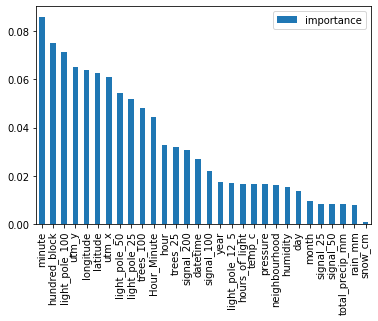

In [9]:
feature_importances.plot.bar()

In [10]:
# Simple Neural Network

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# import needed modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [11]:
# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(30, 30, 30), activation='relu', solver='adam', max_iter=300)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

[[337487   5062]
 [  8916  35537]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98    342549
         1.0       0.88      0.80      0.84     44453

    accuracy                           0.96    387002
   macro avg       0.92      0.89      0.91    387002
weighted avg       0.96      0.96      0.96    387002



In [13]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

[[144558   2286]
 [  3910  15104]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98    146844
         1.0       0.87      0.79      0.83     19014

    accuracy                           0.96    165858
   macro avg       0.92      0.89      0.90    165858
weighted avg       0.96      0.96      0.96    165858



In [14]:
# split training data into training and testing
from sklearn.model_selection import train_test_split

# Select columns to that are data
cols = [col for col in crime if col not in ['type', 'c_id', 'minute', 'hour', 'datetime', 'latitude', 'longitude']]

X = crime[cols]

# Select target data
y = crime['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)

(387002, 25)


In [17]:
# Trying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
model_tree.fit(X_train, y_train)
print(model_tree.feature_importances_)
sel_model_tree = SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')  
      # since we already fit the data, we specify prefit option here
      # Features whose importance is greater or equal to the threshold are kept while the others are discarded.
X_train_sfm_tree = sel_model_tree.transform(X_train)
print(sel_model_tree.get_support())

feature_importances = pd.DataFrame(model_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)

[0.03165382 0.01263877 0.01891587 0.07052375 0.09323768 0.02655871
 0.09310098 0.09563777 0.02260149 0.06154328 0.07066163 0.08983598
 0.00732305 0.01216579 0.02669864 0.04363523 0.04532435 0.06595169
 0.01062439 0.00103359 0.01070351 0.0228091  0.02107339 0.02299649
 0.02275106]
[False False False  True  True False  True  True False  True  True  True
 False False False  True  True  True False False False False False False
 False]


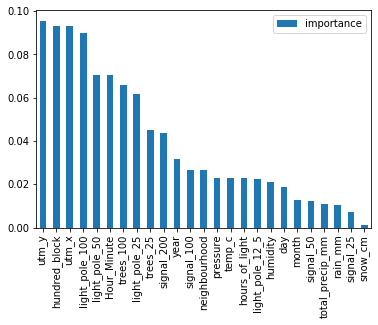

In [18]:
feature_importances.plot.bar()

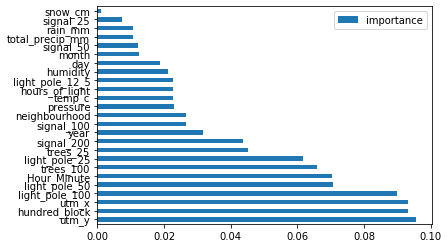

In [22]:
feature_importances.plot.barh()

In [19]:
# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(30, 30, 30), activation='relu', solver='adam', max_iter=300)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [20]:
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

[[337922   4627]
 [ 11626  32827]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98    342549
         1.0       0.88      0.74      0.80     44453

    accuracy                           0.96    387002
   macro avg       0.92      0.86      0.89    387002
weighted avg       0.96      0.96      0.96    387002



In [21]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

[[144715   2129]
 [  5104  13910]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98    146844
         1.0       0.87      0.73      0.79     19014

    accuracy                           0.96    165858
   macro avg       0.92      0.86      0.88    165858
weighted avg       0.95      0.96      0.95    165858



In [ ]:
feature_importances

In [ ]:
# Cut down features

# split training data into training and testing
from sklearn.model_selection import train_test_split

# Select columns to that are data
cols = [col for col in crime if col in ['Hour_Minute', 'hundred_block', 'pressure', 'temp_c', 
                                       'hours_of_light', 'humidity', 'light_pole_100', 'trees_100', 
                                       'rain_mm', 'signal_200']]

X = crime[cols]

# Select target data
y = crime['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)

In [ ]:
X

In [ ]:
# Trying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
model_tree.fit(X_train, y_train)
print(model_tree.feature_importances_)
sel_model_tree = SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')  
      # since we already fit the data, we specify prefit option here
      # Features whose importance is greater or equal to the threshold are kept while the others are discarded.
X_train_sfm_tree = sel_model_tree.transform(X_train)
print(sel_model_tree.get_support())

feature_importances = pd.DataFrame(model_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)

feature_importances

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# import needed modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='relu', solver='adam', max_iter=5000)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

In [ ]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

In [ ]:
# Cut down features further

# split training data into training and testing
from sklearn.model_selection import train_test_split

# Select columns to that are data
cols = [col for col in crime if col in ['Hour_Minute', 'hundred_block', 'pressure', 'temp_c', 
                                       'hours_of_light']]

X = crime[cols]

# Select target data
y = crime['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)

In [ ]:
# Trying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
model_tree.fit(X_train, y_train)
print(model_tree.feature_importances_)
sel_model_tree = SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')  
      # since we already fit the data, we specify prefit option here
      # Features whose importance is greater or equal to the threshold are kept while the others are discarded.
X_train_sfm_tree = sel_model_tree.transform(X_train)
print(sel_model_tree.get_support())

feature_importances = pd.DataFrame(model_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)

feature_importances

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# import needed modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(5, 5, 5), activation='relu', solver='adam', max_iter=5000)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

In [ ]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))